# Identification of Key Genes in DEX stimulation
Goals: <br>
+ identify key genes for further analysis 
+ group genes into different catagories 
+ make list for undergrads to look into
+ do it for two datasets

Explore A1-2 dataset <br>
+ Have time series data for both bulk and single cell





Explore U2OS dataset: <br>
+ S4u => basically the hourly rate of change



In [1]:
import scanpy as sc
import scvi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/formanj/miniconda3/envs/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future r

# A1-2 Single Cell Raw Counts

In [41]:
adata_a12 = sc.read_text('/home/formanj/Desktop/UpDown_Project/Datasets/DUSP1/A1-2_sc_Bulk_GSE141834/GSE141834_scRNAseq_rawCounts.txt').T

In [18]:
np.any(adata_a12.X < 0)

# from this and what I read online, we are in a normalized log space

False

In [42]:
adata_a12.obs['Timepoint'] = [x.split('.')[1] for x in adata_a12.obs_names]
adata_a12.obs['Treatment'] = [x.split('.')[0] for x in adata_a12.obs_names]

adata_a12.obs['Timepoint'] = adata_a12.obs['Timepoint'].astype('category')
adata_a12.obs['Treatment'] = adata_a12.obs['Treatment'].astype('category')

In [43]:
adata_a12.obs

,Timepoint,Treatment
Dex.00.2_AGGTTATCGCCTATATAC,00,Dex
Dex.00.2_CTATTACTATTAGTCCTA,00,Dex
Dex.00.2_CAAGTCATCCGGGGACGA,00,Dex
Dex.00.2_ACCTTCTAATAGTGCTAA,00,Dex
Dex.00.2_TCGCCTAAAGAACATAGA,00,Dex
...,...,...
Dex.18.2_TGCGGTAGGTTAACGGAC,18,Dex
Dex.18.2_TGAGACCTGTGGTCATCA,18,Dex
Dex.18.2_TAGAGGGGCCATAGGTTA,18,Dex
Dex.18.2_TCGGGACACCACCAGGAG,18,Dex


In [44]:
adata_a12_dex = adata_a12[adata_a12.obs['Treatment'] == 'Dex']

In [45]:
"""adata_a12_dex.layers['Logp'] = adata_a12_dex.X
adata_a12_dex.layers['Norm'] = 10 ** adata_a12_dex.layers['Logp']-1
print(adata_a12_dex.layers['Norm']) """

"adata_a12_dex.layers['Logp'] = adata_a12_dex.X\nadata_a12_dex.layers['Norm'] = 10 ** adata_a12_dex.layers['Logp']-1\nprint(adata_a12_dex.layers['Norm']) "

In [67]:
adata_a12_dex.uns['Timepoints'] = set(adata_a12_dex.obs['Timepoint'])
adata_a12_dex.uns['Timepoints'] = list(adata_a12_dex.uns['Timepoints'])
adata_a12_dex.uns['Timepoints'].sort()

adata_a12_dex.uns['avg_DUSP1'] = []
adata_a12_dex.uns['var_DUSP1'] = []
for timepoint in adata_a12_dex.uns['Timepoints']:
    adata_a12_dex.uns['avg_DUSP1'].append(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint][:, 'DUSP1'].X.mean())
    adata_a12_dex.uns['var_DUSP1'].append(np.var(adata_a12_dex[adata_a12_dex.obs['Timepoint'] == timepoint][:, 'DUSP1'].X))



adata_a12_dex.uns['Timepoints'] = [int(i) for i in adata_a12_dex.uns['Timepoints']]

In [68]:
adata_a12_dex.uns['avg_DUSP1']

[array(0.045, dtype=float32),
 array(0.1675, dtype=float32),
 array(0.21, dtype=float32),
 array(0.465, dtype=float32),
 array(1.17, dtype=float32),
 array(1.2475, dtype=float32)]

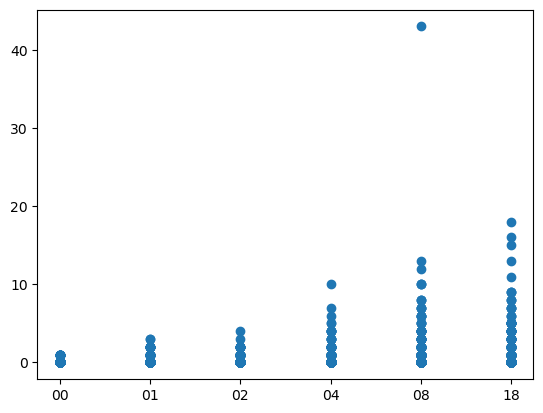

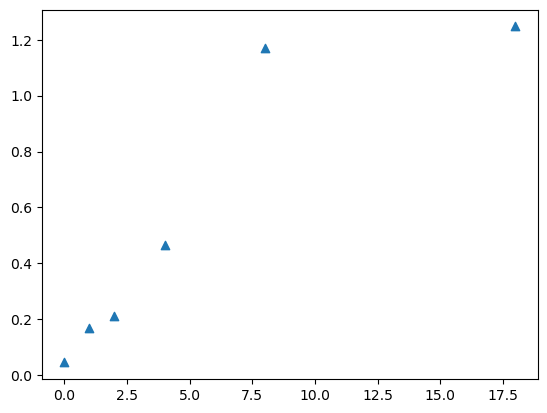

In [70]:
plt.scatter(adata_a12_dex.obs['Timepoint'], adata_a12_dex[:, 'DUSP1'].X)
plt.show()

plt.scatter(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], linestyle='None', marker='^')
#plt.errorbar(list(adata_a12_dex.uns['Timepoints']), adata_a12_dex.uns['avg_DUSP1'], adata_a12_dex.uns['var_DUSP1'], linestyle='None', marker='^')
plt.show()

View of AnnData object with n_obs × n_vars = 2400 × 1
    obs: 'Timepoint', 'Treatment'
    uns: 'Timepoints', 'avg_DUSP1', 'var_DUSP1'

<p> I don't like what they did with this data </p>

# A1-2 Single Cell Normalized/ possibly Z scored idk

In [ ]:
adata_a12 = sc.read_text("/home/formanj/Desktop/UpDown_Project/Datasets/DUSP1/A1-2_sc_Bulk_GSE141834/GSE141834_scRNAseq_seuratV3_normalized.txt").T

# A1-2 Bulk

In [35]:
adata_bulk = sc.read_text('/home/formanj/Desktop/UpDown_Project/Datasets/DUSP1/A1-2_sc_Bulk_GSE141834/GSE141834_bulkRNAseq_normalized_counts.txt').T

In [38]:
adata_bulk.obs_names

Index(['EtOH_rep1', 'EtOH_rep2', 'EtOH_rep3', 'D1hr_rep1', 'D1hr_rep2',
       'D1hr_rep3', 'D2hr_rep1', 'D2hr_rep2', 'D2hr_rep3', 'D4hr_rep1',
       'D4hr_rep2', 'D4hr_rep3', 'D8hr_rep1', 'D8hr_rep2', 'D8hr_rep3',
       'D18hr_rep1', 'D18hr_rep2', 'D18hr_rep3'],
      dtype='object')

In [50]:
adata_bulk.obs['dex_treatment'] = adata_bulk.obs_names.str.startswith('D')
adata_bulk = adata_bulk[adata_bulk.obs['dex_treatment']]

In [51]:
adata_bulk.obs['timepoint'] = [i[1:i.index('h')] for i in adata_bulk.obs_names]

/tmp/ipykernel_2997/2721959214.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_bulk.obs['timepoint'] = [i[1:i.index('h')] for i in adata_bulk.obs_names]


In [63]:
adata_bulk.obs

AnnData object with n_obs × n_vars = 15 × 58259
    obs: 'dex_treatment', 'timepoint'
    uns: 'Timepoints', 'avg_DUSP1'

In [64]:
adata_bulk.uns['Timepoints'] = set(adata_bulk.obs['timepoint'])
adata_bulk.uns['Timepoints'] = [eval(i) for i in adata_bulk.uns['Timepoints']]

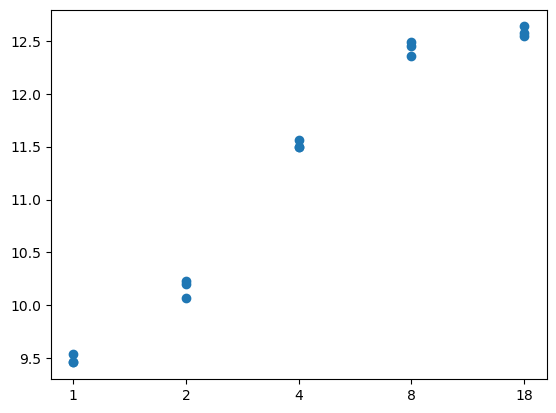

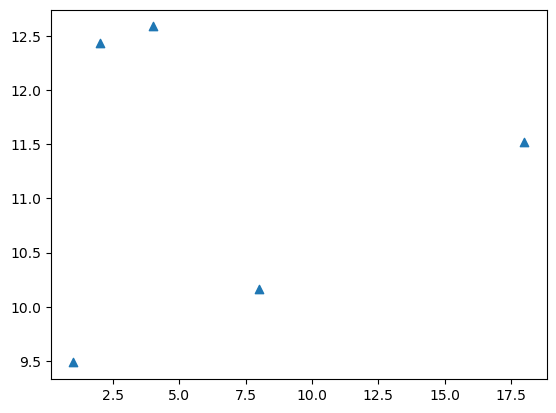

In [65]:
plt.scatter(adata_bulk.obs['timepoint'], adata_bulk[:, 'DUSP1'].X)
plt.show()

plt.scatter(list(adata_bulk.uns['Timepoints']), adata_bulk.uns['avg_DUSP1'], linestyle='None', marker='^')
#plt.errorbar(list(adata_bulk.uns['Timepoints']), adata_bulk.uns['avg_DUSP1'], adata_bulk.uns['var_DUSP1'], linestyle='None', marker='^')
plt.show()